In [ ]:
# !pip install --upgrade numpy


In [ ]:
# !pip uninstall -y pymatgen
# !pip install pymatgen

In [ ]:
import numpy as np
from pymatgen.ext.matproj import MPRester
from pymatgen.analysis.diffraction.xrd import XRDCalculator
from pymatgen.core.structure import Structure
from pymatgen.analysis import structure_matcher
import matplotlib.pyplot as plt
from pymatgen.io.vasp import Poscar
import os

In [ ]:
ideal_list_of_material_ids = {"LGPS (Li10GeP2S12)":"mp-696128", "Li7P3S11":"mp-641703", "LLZO (Li7La3Zr2O12)": "mp-942733", "β-Li3PS4": "mp-1097036"}
non_ideal_list_of_material_ids = {"Lithium titanium phosphate (LiTi2(PO4)3)":"mp-18640", "LiAlSi2O6 (Spodumene)": "mp-558808", "Li3ClO": "mp-985585", "LiH": "mp-23703"}


In [ ]:
api_key = 'lNziq0zLp7W2war5i8hZ9aAC7vQLSRZy'
mpr = MPRester(api_key)

/usr/local/lib/python3.10/dist-packages/mp_api/client/mprester.py:227: UserWarning: mpcontribs-client not installed. Install the package to query MPContribs data, or construct pourbaix diagrams: 'pip install mpcontribs-client'
  warnings.warn(


In [ ]:
def save_vesta_files(material_ids, folder='vesta_files'):
    if not os.path.exists(folder):
        os.makedirs(folder)
    for name, mp_id in material_ids.items():
        structure = mpr.get_structure_by_material_id(mp_id)
        poscar = Poscar(structure)
        with open(os.path.join(folder, f"{name}.vesta"), "w") as f:
            f.write(poscar.get_string())
    print(f"VESTA files saved in {folder} folder")

# Save VESTA files for ideal candidates
save_vesta_files(ideal_list_of_material_ids)

# Save VESTA files for non-ideal candidates
save_vesta_files(non_ideal_list_of_material_ids)


Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

<ipython-input-23-0b3a40c4789e>:8: DeprecationWarning: `get_string` is deprecated!
Use get_str instead
  f.write(poscar.get_string())


Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

VESTA files saved in vesta_files folder


Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

VESTA files saved in vesta_files folder


In [ ]:
# # Install necessary visualization packages
# !pip install crystal-toolkit
# !pip install panel
# !pip install --upgrade param
# !jupyter nbextension install --py crystal_toolkit --sys-prefix
# !jupyter nbextension enable --py crystal_toolkit --sys-prefix

Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

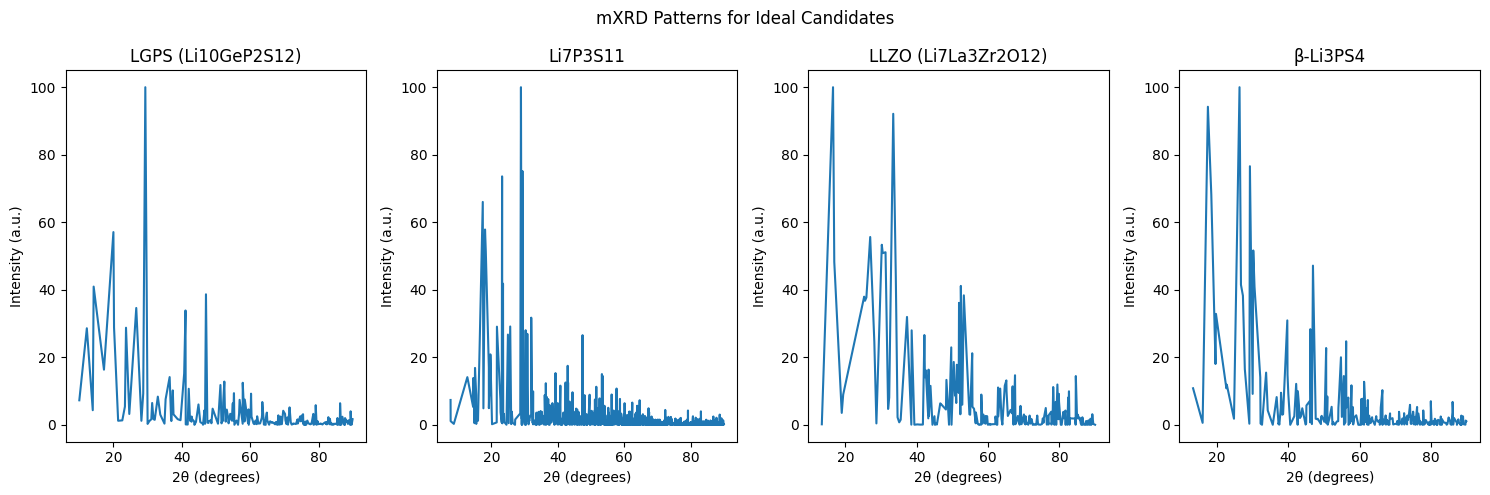

Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

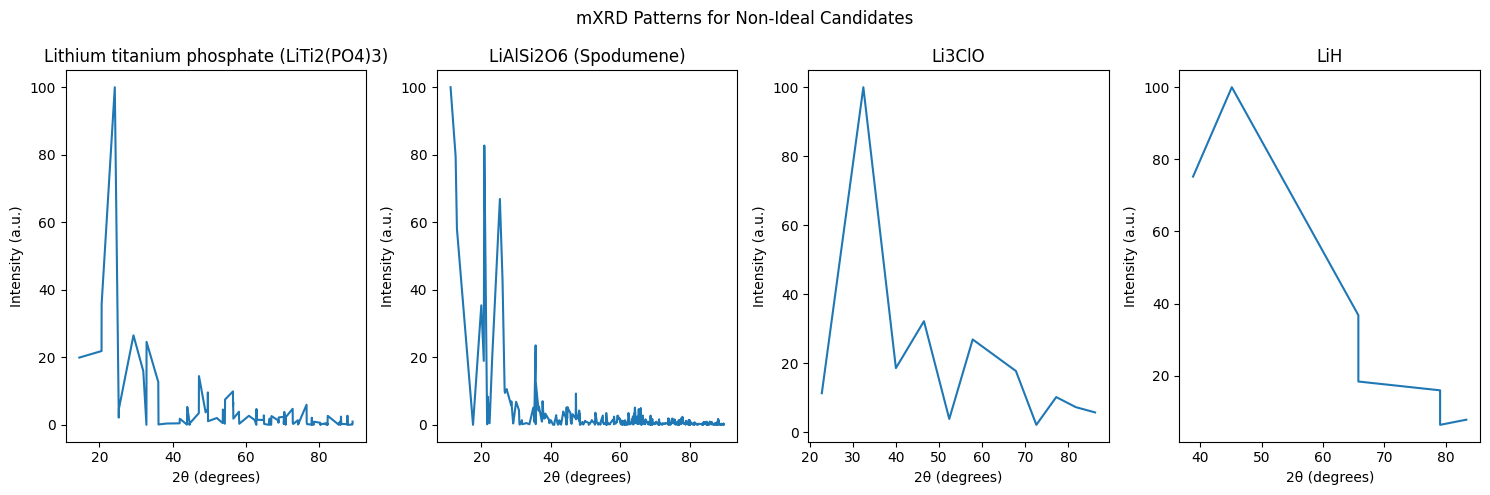

In [ ]:
from pymatgen.analysis.diffraction.xrd import XRDCalculator

def plot_mXRD(material_ids, title):
    fig, axes = plt.subplots(nrows=1, ncols=len(material_ids), figsize=(15, 5))

    if len(material_ids) == 1:
        axes = [axes]

    xrd_calculator = XRDCalculator(wavelength='CuKa', symprec=0)

    for i, (name, mp_id) in enumerate(material_ids.items()):
        structure = mpr.get_structure_by_material_id(mp_id)
        pattern = xrd_calculator.get_pattern(structure)
        axes[i].plot(pattern.x, pattern.y, label=name)
        axes[i].set_title(name)
        axes[i].set_xlabel('2θ (degrees)')
        axes[i].set_ylabel('Intensity (a.u.)')

    fig.suptitle(title)
    plt.tight_layout()
    plt.show()

# Plot mXRD patterns for ideal candidates
plot_mXRD(ideal_list_of_material_ids, 'mXRD Patterns for Ideal Candidates')

# Plot mXRD patterns for non-ideal candidates
plot_mXRD(non_ideal_list_of_material_ids, 'mXRD Patterns for Non-Ideal Candidates')


Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

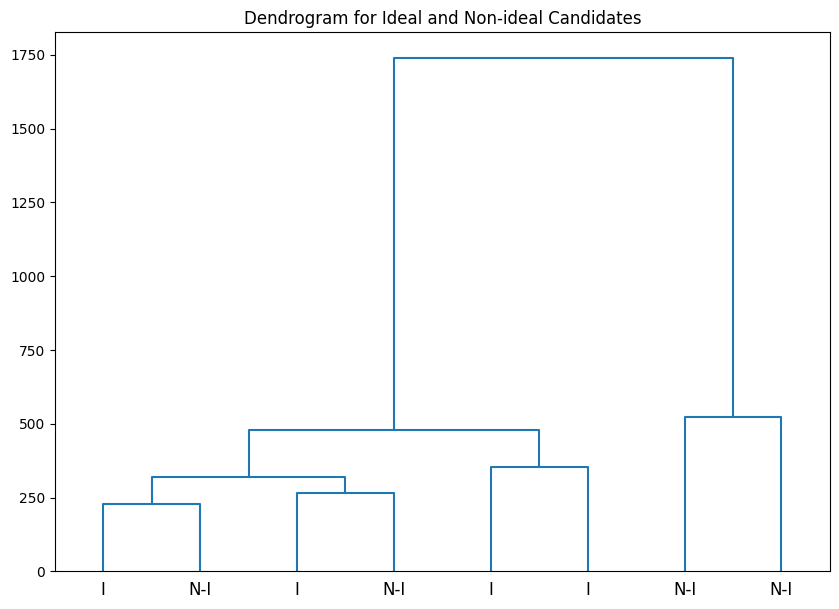

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
from scipy.interpolate import interp1d

def plot_dendrogram(model, labels, **kwargs):
    # Create linkage matrix and then plot the dendrogram
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_, counts]).astype(float)
    dendrogram(linkage_matrix, labels=labels, **kwargs)

def interpolate_data(data, target_length=1000):
    interpolated_data = []
    for d in data:
        x = np.arange(len(d))
        f = interp1d(x, d, kind='linear')
        x_new = np.linspace(0, len(d) - 1, target_length)
        y_new = f(x_new)
        interpolated_data.append(y_new)
    return np.array(interpolated_data)

# Prepare mXRD data for clustering
mXRD_data = []
material_names = []
xrd_calculator = XRDCalculator()

# Include ideal candidates
for name, mp_id in ideal_list_of_material_ids.items():
    structure = mpr.get_structure_by_material_id(mp_id)
    pattern = xrd_calculator.get_pattern(structure)
    mXRD_data.append(pattern.y)
    material_names.append('I')

# Include non-ideal candidates
for name, mp_id in non_ideal_list_of_material_ids.items():
    structure = mpr.get_structure_by_material_id(mp_id)
    pattern = xrd_calculator.get_pattern(structure)
    mXRD_data.append(pattern.y)
    material_names.append('N-I')

# Interpolate mXRD data to the same length
mXRD_data = interpolate_data(mXRD_data)

# Perform hierarchical clustering
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
model = model.fit(mXRD_data)

# Plot the dendrogram
plt.figure(figsize=(10, 7))
plot_dendrogram(model, labels=material_names, color_threshold=1)
plt.title('Dendrogram for Ideal and Non-ideal Candidates')
plt.show()


Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

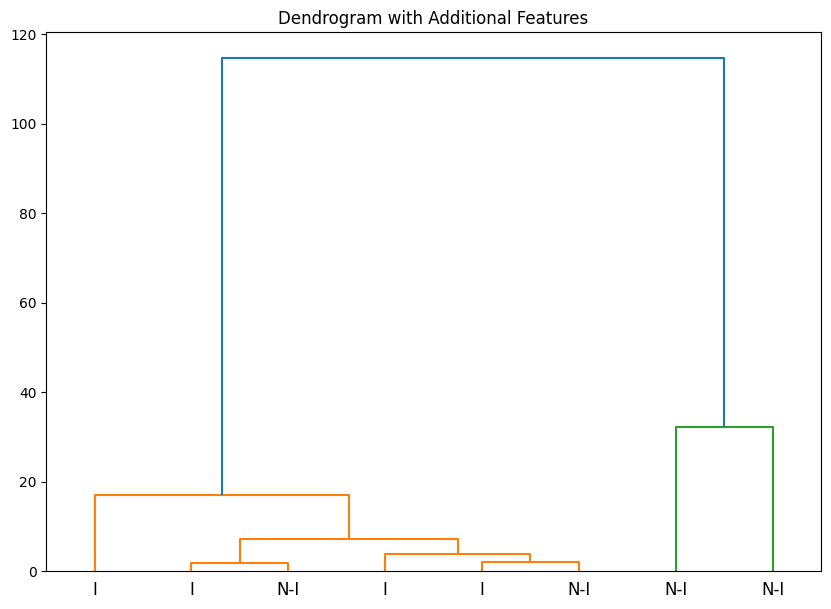

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Prepare data for clustering
material_ids = {**ideal_list_of_material_ids, **non_ideal_list_of_material_ids}
mXRD_data = []
density_data = []
volume_data = []
space_group_data = []
labels = []
for name, mp_id in material_ids.items():
    structure = mpr.get_structure_by_material_id(mp_id)
    pattern = xrd_calculator.get_pattern(structure)
    mXRD_data.append(pattern.y)
    density_data.append(structure.density)
    volume_data.append(structure.volume)
    space_group_data.append(structure.get_space_group_info()[1])
    labels.append('I' if name in ideal_list_of_material_ids else 'N-I')

# Interpolate mXRD data to the same length
mXRD_data = interpolate_data(mXRD_data)

# Combine all features
all_data = np.column_stack((mXRD_data, density_data, volume_data, space_group_data))

# Normalize data
scaler = StandardScaler()
all_data = scaler.fit_transform(all_data)

# Perform PCA to reduce dimensionality
pca = PCA(n_components=2)
all_data = pca.fit_transform(all_data)

# Perform hierarchical clustering
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
model = model.fit(all_data)

# Plot the dendrogram
plt.figure(figsize=(10, 7))
plot_dendrogram(model, labels=labels)
plt.title('Dendrogram with Additional Features')
plt.show()



<ipython-input-36-805a78d2f865>:8: DeprecationWarning: Accessing summary data through MPRester.summary is deprecated. Please use MPRester.materials.summary instead.
  data = mpr.summary.search(material_ids=ids, fields=["material_id", "energy_per_atom"])


Retrieving SummaryDoc documents:   0%|          | 0/4 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/4 [00:00<?, ?it/s]

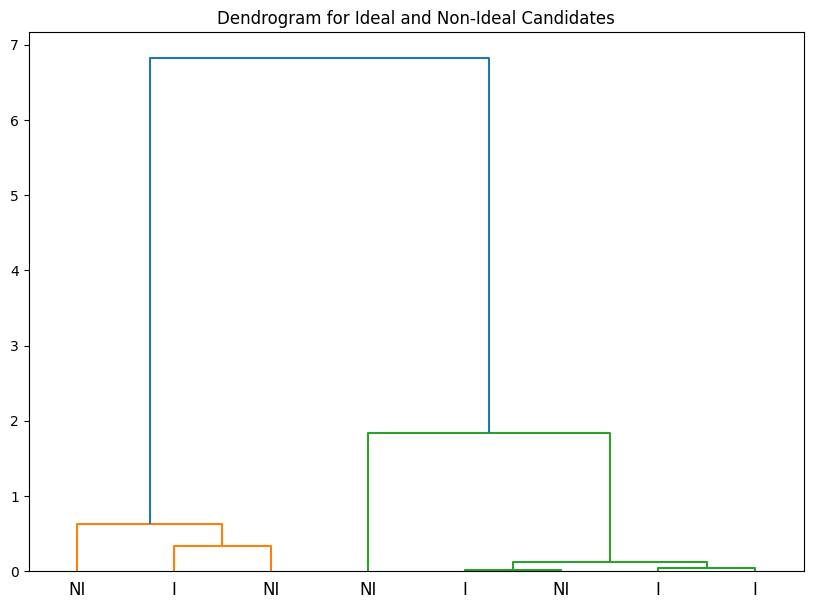

In [ ]:
# Function to get DFT energies for a list of material IDs
def get_dft_energies(material_ids):
    energies = []
    names = []
    ids = list(material_ids.values())
    with mpr:
        # Query for energy data
        data = mpr.summary.search(material_ids=ids, fields=["material_id", "energy_per_atom"])
        for doc in data:
            energy = doc.energy_per_atom
            name = [k for k, v in material_ids.items() if v == doc.material_id][0]
            if energy is not None:
                energies.append(energy)
                names.append(name)
    return np.array(energies).reshape(-1, 1), names

ideal_energies, ideal_names = get_dft_energies(ideal_list_of_material_ids)
non_ideal_energies, non_ideal_names = get_dft_energies(non_ideal_list_of_material_ids)

# Combine energies and names for clustering
all_energies = np.vstack((ideal_energies, non_ideal_energies))
all_names = ["I" for _ in ideal_names] + ["NI" for _ in non_ideal_names]

# Perform hierarchical clustering
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
model = model.fit(all_energies)

# Plot the dendrogram
plt.figure(figsize=(10, 7))
plot_dendrogram(model, labels=all_names)
plt.title('Dendrogram for Ideal and Non-Ideal Candidates')
plt.show()